<a href="https://colab.research.google.com/github/chavgova/My-AI/blob/master/emotion_recognition_18_female_cleanCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Voice Emotion Recognition**





In [38]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import model_from_json
from matplotlib.pyplot import specgram
from matplotlib.axis import Axis
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras import regularizers
import os
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from array import *
import re
from sklearn.preprocessing import MinMaxScaler
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pickle

In [55]:
dataset_path = '/content/drive/My Drive/My_AI/RawData'  # https://drive.google.com/drive/folders/19vC20XHt-_yhsobePchy7K3PcBHD1oCu?usp=sharing
model_path = '/content/drive/MyDrive/My_AI/EmoRec/'      #'/content/drive/My Drive/My_AI/MY MODELS/'

model_name = 'EmotionRecognition_CNN_model_18_FEMALE_8features_100epochs'
gender = 'female'  # female/male

# LABLES & FEATURES

In [ ]:
dataset_files_list = [] 
dataset_files_list = os.listdir(dataset_path)

print(len(dataset_files_list))

In [ ]:
emo_labels_list=[] 
dataset = ''
count = 0
for item in dataset_files_list:
    file_label = item[6:-16]
    try:
      file_label = int(file_label)
      dataset = 'RAVDESS'
    except:
      if (item[:1] == 'Y') or (item[:1] == 'O'):
        file_label = re.split('_|\.', item)[2]
        dataset = 'TESS'
      else: 
        try:
          item = item[:-4]
          int(item[-3:])  
          dataset = 'SER_v4'
        except:
          dataset = 'SAVEE'

    if dataset == 'RAVDESS':
      if int(item[18:-4])%2==0:  #female
          if file_label == 1:
            emo_labels_list.append('female_neutral')
          elif file_label == 2:
            emo_labels_list.append('female_calm')
          elif file_label == 3:
            emo_labels_list.append('female_joy')
          elif file_label == 4:
            emo_labels_list.append('female_sadness')
          elif file_label == 5:
            emo_labels_list.append('female_anger')
          elif file_label == 6:
            emo_labels_list.append('female_fear')
          elif file_label == 7:
            emo_labels_list.append('female_disgust')
          elif file_label == 8:
            emo_labels_list.append('female_surprise')
      else:
          if file_label== 1:
            emo_labels_list.append('male_neutral')
          elif file_label == 2:
            emo_labels_list.append('male_calm')
          elif file_label == 3:
            emo_labels_list.append('male_joy')
          elif file_label == 4:
            emo_labels_list.append('male_sadness')
          elif file_label == 5:
            emo_labels_list.append('male_anger')
          elif file_label == 6:
            emo_labels_list.append('male_fear')
          elif file_label == 7:
            emo_labels_list.append('male_disgust')
          elif file_label == 8:
            emo_labels_list.append('male_surprise')

    elif dataset == 'TESS':
      if file_label == 'neutral': emo_labels_list.append('female_neutral')
      elif file_label == 'angry': emo_labels_list.append('female_anger')
      elif file_label == 'disgust': emo_labels_list.append('female_disgust')
      elif file_label == 'ps': emo_labels_list.append('female_surprise')
      elif file_label == 'happy': emo_labels_list.append('female_joy')
      elif file_label == 'sad': emo_labels_list.append('female_sadness')
      elif file_label == 'fear': emo_labels_list.append('female_fear')

    elif dataset == 'SER_v4':
      if int(item[-3:])%2 == 1: 
        file_label = item[:-3]
        if file_label == 'neutral': emo_labels_list.append('male_neutral')
        elif file_label == 'anger': emo_labels_list.append('male_anger')
        elif file_label == 'disgust': emo_labels_list.append('male_disgust')
        elif file_label == 'surprise': emo_labels_list.append('male_surprise')
        elif file_label == 'happy': emo_labels_list.append('male_joy')
        elif file_label == 'sad': emo_labels_list.append('male_sadness')
        elif file_label == 'fear': emo_labels_list.append('male_fear')
      else:
        file_label = item[:-3]
        if file_label == 'neutral': emo_labels_list.append('female_neutral')
        elif file_label == 'anger': emo_labels_list.append('female_anger')
        elif file_label == 'disgust': emo_labels_list.append('female_disgust')
        elif file_label == 'surprise': emo_labels_list.append('female_surprise')
        elif file_label == 'happy': emo_labels_list.append('female_joy')
        elif file_label == 'sad': emo_labels_list.append('female_sadness')
        elif file_label == 'fear': emo_labels_list.append('female_fear')
      
    elif dataset == 'SAVEE':
      if item[:1]=='a':
        emo_labels_list.append('male_anger')
      elif item[:1]=='f':
        emo_labels_list.append('male_fear')
      elif item[:1]=='h':
        emo_labels_list.append('male_joy')
      elif item[:1]=='n':
        emo_labels_list.append('male_neutral')
      elif item[:2]=='sa':
        emo_labels_list.append('male_sadness')
      elif item[:2]=='su':
        emo_labels_list.append('male_surprise')
      elif item[:1]=='d':
        emo_labels_list.append('male_disgust')


In [ ]:
labels = pd.DataFrame(emo_labels_list)
labels   

,0
0,male_sadness
1,male_sadness
2,male_sadness
3,female_sadness
4,male_sadness
...,...
7193,male_fear
7194,male_anger
7195,female_calm
7196,female_sadness


Getting the features of audio files using librosa

In [40]:
def reshape_feature(arr):   # to 10 values per feature
  shape_arr = arr.shape[0]
  r = shape_arr%10
  arr = arr[:(len(arr)-r)]
  d = int(shape_arr/10)
  arr = np.mean(arr.reshape(-1, d), axis=1) 
  return arr


def extract_feature(current_file, **kwargs):
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    rolloff = kwargs.get("rolloff")
    centroids = kwargs.get("centroids")
    rms = kwargs.get("rms")

    X, sample_rate = librosa.core.load(current_file)

    if chroma or contrast:
        stft = np.abs(librosa.stft(X))
    result = np.array([])
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)# (n=40,t) -> 40 values 
        result = np.hstack((result, mfccs))  
    if rms:    
        rms = np.mean(librosa.feature.rms(X),axis=0)
        rms = reshape_feature(rms)      # (1,t) - > 10 values (avg)
        result = np.hstack((result, rms))        
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0) # (128,t) -> 128 values   
        result = np.hstack((result, mel)) 
    if tonnetz:
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0) # (6,t) -> 6 values     
        result = np.hstack((result, tonnetz))
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, n_chroma = 14, sr=sample_rate).T,axis=0)  # (n=14,t) -> 14 values        
        result = np.hstack((result, chroma))              
    if contrast:
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0) # (7,t) -> 7 values
        result = np.hstack((result, contrast)) 
    if rolloff:    
        rolloff = np.mean(librosa.feature.spectral_rolloff(X+0.01, sr=sample_rate),axis=0)
        rolloff = reshape_feature(rolloff)    # (1,t) - > 10 values (avg)
        result = np.hstack((result, rolloff)) 
    if centroids:    
        centroids = np.mean(librosa.feature.spectral_centroid(X, sr=sample_rate),axis=0)
        centroids = reshape_feature(centroids)  # (1,t) - > 10 values (avg)
        result = np.hstack((result, centroids)) 
    
    return result

f = os.fspath(dataset_path +'/03-01-04-01-02-02-01.wav')
a = extract_feature(f, mel=True, mfcc=True, contrast=True, chroma=True, tonnetz=True, rolloff=True, centroids=True, rms=True)
print(a, a.shape)

[-7.11961060e+02  5.99244232e+01  3.83192271e-01  1.59403591e+01
  5.67376900e+00  1.53520793e-01  8.92264783e-01 -7.20391083e+00
 -1.25652571e+01 -3.65540648e+00 -2.70926380e+00 -2.14541817e+00
 -3.53641719e-01 -3.74469924e+00 -2.85052490e+00  2.17255926e+00
 -3.43898535e+00 -3.96823716e+00 -1.86625969e+00  1.59572497e-01
 -6.75410128e+00 -1.73930418e+00 -2.20268345e+00 -3.39606977e+00
 -2.21927452e+00 -4.38045233e-01 -4.57583570e+00 -2.13146973e+00
 -2.53880334e+00  1.23917490e-01 -1.93521500e+00 -1.47470093e+00
 -2.17954540e+00 -2.38947201e+00 -4.25227070e+00 -1.58187962e+00
 -2.25012422e+00 -1.58634901e+00 -2.81825447e+00 -2.49687386e+00
  4.40952726e-06  1.31456466e-06  2.27152050e-05  7.13768462e-03
  5.94100310e-03  6.31744554e-03  3.85051640e-03  6.29960035e-04
  8.80118478e-06  1.85505723e-06  2.49405844e-06  5.83407891e-05
  3.31626995e-03  2.22720150e-02  2.82310750e-02  8.91589466e-03
  4.50106710e-03  2.20895037e-02  2.94586308e-02  2.15100236e-02
  9.77406744e-03  1.24280

EXTRACT FEATURES FROM THE FILES IN THE DATASETS

In [ ]:
data_frame = pd.DataFrame(columns=['all_features'])
bookmark=0

for index,y in enumerate(dataset_files_list):
      all_features_ndarray = extract_feature(dataset_path + y, mel=True, mfcc=True, contrast=True, chroma=True, tonnetz=True, rolloff=True, centroids=True, rms=True)
      data_frame.loc[bookmark] = [all_features_ndarray]
      bookmark=bookmark+1
      if bookmark%1000==0: print(bookmark)

print(pd.DataFrame(data_frame['all_features']).shape)
        

In [ ]:
data_frame = pd.DataFrame(data_frame['all_features'].values.tolist())
data_frame_labels = pd.concat([data_frame,labels], axis=1)
data_frame_labels = data_frame_labels.rename(index=str, columns={"0": "label"})
data_frame_labels  

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224
0,-677.012607,68.128887,1.226144,13.246095,1.681556,0.729557,-13.641576,-3.576321,-8.595147,-4.046197,4.691763,-6.023820,1.683967,-0.069172,-5.879847,0.592705,-6.601959,-6.193829,0.361195,-2.431681,-6.519171,-0.058899,-5.800941,-3.980719,-2.219832,-0.920634,-2.284002,-1.727077,-1.160240,-1.174291,-2.115416,0.928084,1.233274,5.737881,-0.308995,2.263868,0.248554,6.760577,9.820166,17.682036,...,0.563259,0.491308,0.583315,0.633197,0.679227,0.749516,0.582634,0.494202,0.531570,0.512122,0.458497,0.463920,0.566851,23.916075,17.319184,20.345724,18.528481,18.319662,17.714452,30.448045,10.766602,10.766602,2483.118318,3031.648335,2326.719264,1352.058491,1034.160413,592.163086,10.766602,10.766602,4141.946889,3960.300525,3169.100261,2211.468405,1750.150643,1249.341416,1107.307061,874.524551,3054.225012,3151.287050
1,-557.077631,37.731340,-25.690923,2.721265,-8.469222,-16.783412,-11.141711,-16.858932,-20.300446,1.526086,-9.046842,-4.551558,-5.803873,-6.084743,0.324458,-1.555424,-1.621261,13.536664,13.608310,16.614511,16.819150,12.947100,1.430434,4.995464,-5.904416,3.786624,2.862549,2.213109,-3.014830,-2.941496,0.153834,5.607506,1.279606,-2.695713,-3.278017,1.666410,3.034963,-0.849230,3.336941,10.858757,...,0.491847,0.444110,0.454247,0.493769,0.492756,0.661281,0.718564,0.530350,0.553521,0.602293,0.517585,0.451096,0.424385,19.880041,22.838296,21.529882,20.549496,20.496978,20.783570,32.063672,10.766602,99.462891,4120.532227,4847.534180,3142.309570,2521.435547,3741.650391,1993.359375,87.158203,10.766602,4724.091019,3319.011026,2992.454686,3003.583954,1871.331079,1582.119839,2224.851651,1357.369560,3383.279798,4125.006267
2,-651.306815,28.174297,-22.387151,-3.099898,-21.895704,-20.684444,-6.937055,-22.691892,-16.077010,-2.648343,-13.845468,-4.334402,-9.532113,-4.433517,-8.319336,-6.686531,5.342289,12.560371,14.379339,23.704241,15.249805,10.304655,-0.133664,1.355806,-6.263078,1.910011,-2.980607,-1.288093,-8.861574,-4.063428,-4.258260,2.463083,-3.307999,-5.789722,-2.006577,1.961835,-0.318634,0.151110,3.371160,9.975064,...,0.329323,0.309499,0.281291,0.325560,0.367705,0.500406,0.605766,0.484343,0.392134,0.408733,0.364195,0.290005,0.278199,16.241609,27.394842,23.728332,21.416993,20.492162,20.763445,30.739935,10.766602,746.810636,4213.656339,3384.628018,2375.014426,4060.476962,1512.218129,1479.428933,108.644798,10.766602,1005.430834,1924.243185,2937.317570,2505.250228,1780.086072,2723.276573,1538.029538,1392.617717,3731.779374,4747.144549
3,-598.479799,83.876933,-4.367654,17.879762,1.207946,-22.144229,-9.396517,-0.343920,-17.230260,2.128921,-0.053539,-7.968760,-5.630409,0.340969,-4.279300,-0.842008,-4.132873,-3.515869,-1.105263,-3.192063,-7.741529,-2.782670,-8.780764,-1.375007,-4.971819,1.227432,-5.522446,-0.596580,-2.901904,-2.884426,-0.602703,-0.587759,0.122286,2.224288,3.667640,1.273863,-0.666005,2.981427,6.911973,14.680708,...,0.532198,0.434175,0.455267,0.475820,0.525077,0.628532,0.578828,0.479653,0.514261,0.543563,0.464444,0.399926,0.475848,25.398912,18.158348,19.869336,20.598790,18.313720,20.464000,30.941011,10.766602,657.698922,3549.233611,2963.155995,2875.150730,1704.867952,2240.389351,805.622665,501.817255,10.766602,3090.152980,2984.077314,2357.822539,1973.434529,1943.695531,1239.052240,1601.832606,852.554178,1158.985943,2473.661473
4,-620.545440,63.076147,-4.554053,12.682791,0.132151,1.816087,-10.988464,-12.289517,-18.790218,-3.880212,-2.682088,-8.190950,-5.754832,-9.954274,-0.609016,2.046038,-12.034189,-4.354440,-3.916669,-7.596240,-10.865715,-2.858283,-8.838741,-8.424173,-3.157844,-6.277223,-5.993330,-3.999957,-6.670746,-3.156587,-4.428938,-0.825791,0.930508,-1.368441,-1.244825,0.040529,0.498666,3.362422,8.152221,14.178395,...,0.534658,0.466229,0.507336,0.567961,0.628232

# SAVE DATASET FEATURES AND LABELS 

In [ ]:
with open((model_path + model_name + '_dataFrame.pkl'), 'wb') as f:
  pickle.dump(data_frame_labels, f)

# LOAD DATASET FEATURES AND LABELS 

In [ ]:
#with open((model_path + model_name + '_dataFrame.pkl'), 'rb') as f:
with open(('/content/drive/MyDrive/My_AI/datasets_RAVDESS-TESS-SAVEE-SER_v4_features&labels_8features.pkl'), 'rb') as f:
  data_frame_labels = pickle.load(f)

data_frame_labels

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,0
0,-677.012607,68.128887,1.226144,13.246095,1.681556,0.729557,-13.641576,-3.576321,-8.595147,-4.046197,4.691763,-6.023820,1.683967,-0.069172,-5.879847,0.592705,-6.601959,-6.193829,0.361195,-2.431681,-6.519171,-0.058899,-5.800941,-3.980719,-2.219832,-0.920634,-2.284002,-1.727077,-1.160240,-1.174291,-2.115416,0.928084,1.233274,5.737881,-0.308995,2.263868,0.248554,6.760577,9.820166,17.682036,...,18.319662,17.714452,30.448045,-0.004361,0.037457,-0.087636,0.093932,-0.014055,0.001691,10.766602,10.766602,2483.118318,3031.648335,2326.719264,1352.058491,1034.160413,592.163086,10.766602,10.766602,4141.946889,3960.300525,3169.100261,2211.468405,1750.150643,1249.341416,1107.307061,874.524551,3054.225012,3151.287050,1.275939e-05,1.837397e-05,0.001840,0.006945,0.006974,0.007772,0.005745,0.004917,0.000101,0.000083,male_sadness
1,-557.077631,37.731340,-25.690923,2.721265,-8.469222,-16.783412,-11.141711,-16.858932,-20.300446,1.526086,-9.046842,-4.551558,-5.803873,-6.084743,0.324458,-1.555424,-1.621261,13.536664,13.608310,16.614511,16.819150,12.947100,1.430434,4.995464,-5.904416,3.786624,2.862549,2.213109,-3.014830,-2.941496,0.153834,5.607506,1.279606,-2.695713,-3.278017,1.666410,3.034963,-0.849230,3.336941,10.858757,...,20.496978,20.783570,32.063672,-0.024152,0.004360,-0.089657,0.016837,-0.026475,0.004225,10.766602,99.462891,4120.532227,4847.534180,3142.309570,2521.435547,3741.650391,1993.359375,87.158203,10.766602,4724.091019,3319.011026,2992.454686,3003.583954,1871.331079,1582.119839,2224.851651,1357.369560,3383.279798,4125.006267,3.837804e-06,9.196399e-05,0.009108,0.012666,0.030902,0.023994,0.014636,0.020256,0.000184,0.000019,male_sadness
2,-651.306815,28.174297,-22.387151,-3.099898,-21.895704,-20.684444,-6.937055,-22.691892,-16.077010,-2.648343,-13.845468,-4.334402,-9.532113,-4.433517,-8.319336,-6.686531,5.342289,12.560371,14.379339,23.704241,15.249805,10.304655,-0.133664,1.355806,-6.263078,1.910011,-2.980607,-1.288093,-8.861574,-4.063428,-4.258260,2.463083,-3.307999,-5.789722,-2.006577,1.961835,-0.318634,0.151110,3.371160,9.975064,...,20.492162,20.763445,30.739935,-0.023073,-0.002119,-0.095040,-0.003464,-0.024537,0.006680,10.766602,746.810636,4213.656339,3384.628018,2375.014426,4060.476962,1512.218129,1479.428933,108.644798,10.766602,1005.430834,1924.243185,2937.317570,2505.250228,1780.086072,2723.276573,1538.029538,1392.617717,3731.779374,4747.144549,6.222113e-07,9.804880e-05,0.006586,0.007667,0.008629,0.006623,0.006743,0.007385,0.000361,0.000003,male_sadness
3,-598.479799,83.876933,-4.367654,17.879762,1.207946,-22.144229,-9.396517,-0.343920,-17.230260,2.128921,-0.053539,-7.968760,-5.630409,0.340969,-4.279300,-0.842008,-4.132873,-3.515869,-1.105263,-3.192063,-7.741529,-2.782670,-8.780764,-1.375007,-4.971819,1.227432,-5.522446,-0.596580,-2.901904,-2.884426,-0.602703,-0.587759,0.122286,2.224288,3.667640,1.273863,-0.666005,2.981427,6.911973,14.680708,...,18.313720,20.464000,30.941011,-0.015649,0.016699,-0.047501,0.073534,-0.012227,0.004259,10.766602,657.698922,3549.233611,2963.155995,2875.150730,1704.867952,2240.389351,805.622665,501.817255,10.766602,3090.152980,2984.077314,2357.822539,1973.434529,1943.695531,1239.052240,1601.832606,852.554178,1158.985943,2473.661473,6.118279e-05,2.461580e-04,0.006546,0.011865,0.007853,0.008946,0.006515,0.010970,0.004595,0.000020,female_sadness
4,-620.545440,63.076147,-4.554053,12.682791,0.132151,1.816087,-10.988464,-12.289517,-18.790218,-3.880212,-2.682088,-8.190950,-5.754832,-9.954274,-0.609016,2.046038,-12.034189,-4.354440,-3.916669,-7.596240,-10.865715,-2.858283,-8.838741,-8.424173,-3.157844,-6.277223,-5.993330,-3.999957,-6.670746,-3.156587,-4.428938,-0.825791,0.930508,-1.368441,-1.244825,0.040529,0.498666,3.362422,8.152221,14.178395,..

In [ ]:
labels_array = data_frame_labels.iloc[:,(data_frame_labels.shape[1]-1):].to_numpy()
features_array = data_frame_labels.iloc[:,:(data_frame_labels.shape[1]-1)].to_numpy()
print(labels_array)
print(features_array)
print(labels_array.shape)
print(features_array.shape)

[['male_sadness']
 ['male_sadness']
 ['male_sadness']
 ...
 ['female_calm']
 ['female_sadness']
 ['female_joy']]
[[-6.77012607e+02  6.81288872e+01  1.22614371e+00 ...  4.91705909e-03
   1.01431571e-04  8.32852020e-05]
 [-5.57077631e+02  3.77313397e+01 -2.56909235e+01 ...  2.02558134e-02
   1.84160701e-04  1.86080779e-05]
 [-6.51306815e+02  2.81742966e+01 -2.23871507e+01 ...  7.38549791e-03
   3.61316110e-04  3.36419976e-06]
 ...
 [-7.27802977e+02  4.74886694e+01 -3.98731302e+00 ...  5.15490479e-04
   1.72984888e-04  1.00708698e-04]
 [-7.14319052e+02  4.98782376e+01 -4.65872935e+00 ...  5.66027535e-04
   2.62750509e-05  1.15677849e-05]
 [-6.14432442e+02  6.15239027e+01 -4.08322423e+01 ...  3.17968847e-03
   1.44974896e-04  9.03972177e-05]]
(7198, 1)
(7198, 225)


# **PREPROCESSING - SCALING**




In [ ]:
scaler = MinMaxScaler()
features_array_scaled = scaler.fit_transform(features_array)

pickle.dump(scaler, open(model_name + '_SCALER.sav', 'wb'))

features_array_scaled

array([[2.63562615e-01, 4.34875734e-01, 5.53198767e-01, ...,
        9.81368209e-03, 1.96806498e-04, 2.97190297e-04],
       [4.47443794e-01, 2.54127550e-01, 2.94514357e-01, ...,
        4.07372357e-02, 3.62071270e-04, 6.64000333e-05],
       [3.02974065e-01, 1.97299999e-01, 3.26265012e-01, ...,
        1.47901553e-02, 7.15967757e-04, 1.20046239e-05],
       ...,
       [1.85692143e-01, 3.12146034e-01, 5.03095241e-01, ...,
        9.39940425e-04, 3.39745783e-04, 3.59363332e-04],
       [2.06365345e-01, 3.26354750e-01, 4.96642646e-01, ...,
        1.04182519e-03, 4.66692335e-05, 4.12778422e-05],
       [3.59508893e-01, 3.95601547e-01, 1.48999874e-01, ...,
        6.31107213e-03, 2.83791309e-04, 3.22568419e-04]])

In [ ]:
scaler = pickle.load(open(model_name + '_SCALER.sav', 'rb'))
features_array_scaled = scaler.transform(features_array)
features_array_scaled

array([[2.63562615e-01, 4.34875734e-01, 5.53198767e-01, ...,
        9.81368209e-03, 1.96806498e-04, 2.97190297e-04],
       [4.47443794e-01, 2.54127550e-01, 2.94514357e-01, ...,
        4.07372357e-02, 3.62071270e-04, 6.64000333e-05],
       [3.02974065e-01, 1.97299999e-01, 3.26265012e-01, ...,
        1.47901553e-02, 7.15967757e-04, 1.20046239e-05],
       ...,
       [1.85692143e-01, 3.12146034e-01, 5.03095241e-01, ...,
        9.39940425e-04, 3.39745783e-04, 3.59363332e-04],
       [2.06365345e-01, 3.26354750e-01, 4.96642646e-01, ...,
        1.04182519e-03, 4.66692335e-05, 4.12778422e-05],
       [3.59508893e-01, 3.95601547e-01, 1.48999874e-01, ...,
        6.31107213e-03, 2.83791309e-04, 3.22568419e-04]])

# **SAVE SCALED ARRAY AND LABELS**






In [ ]:
with open((model_path + model_name + '_SCALED_featuresArray.pkl'), 'wb') as f:
  pickle.dump(features_array_scaled, f)

with open((model_path + model_name + '_labelsArray.pkl'), 'wb') as f:
  pickle.dump(labels_array, f)

# LOAD LABELS AND SCALED FEATURES

In [44]:
with open((model_path + model_name + '_SCALED_featuresArray.pkl'), 'rb') as f:
  features_array_scaled = pickle.load(f)

with open((model_path + model_name + '_labelsArray.pkl'), 'rb') as f:
  labels_array = pickle.load(f)

In [45]:
def takeMaleData(labels_array, features_array_scaled):
  labels_filtered_array = []
  features_filtered_array =  []

  for index, i in enumerate(labels_array):
    if 'female' not in i[0]:  
      labels_filtered_array.append(labels_array[index])
      features_filtered_array.append(features_array_scaled[index])
  return np.array(labels_filtered_array), np.array(features_filtered_array)

def takeFemaleData(labels_array, features_array_scaled):
  labels_filtered_array = []
  features_filtered_array =  []

  for index, i in enumerate(labels_array):
    if 'female' in i[0]:  
      labels_filtered_array.append(labels_array[index])
      features_filtered_array.append(features_array_scaled[index])
  return np.array(labels_filtered_array), np.array(features_filtered_array)

if gender.lower() == 'female':
  labels_filtered_array, features_filtered_array = takeFemaleData(labels_array, features_array_scaled)  
elif gender.lower() == 'male':
  labels_filtered_array, features_filtered_array = takeMaleData(labels_array, features_array_scaled) 
  
print(labels_filtered_array)
print(labels_filtered_array.shape)

[['female_sadness']
 ['female_sadness']
 ['female_sadness']
 ...
 ['female_calm']
 ['female_sadness']
 ['female_joy']]
(4745, 1)


SAVE LABEL ENCODER CLASSES

In [46]:
lb = LabelEncoder()
lb.fit(labels_filtered_array)
print(lb.classes_)
with open((model_path + gender + '_classes_emotions.pkl'), 'wb') as f:
  pickle.dump(lb.classes_, f)  

['female_anger' 'female_calm' 'female_disgust' 'female_fear' 'female_joy'
 'female_neutral' 'female_sadness' 'female_surprise']


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LOAD LABEL ENCODER CLASSES

In [47]:
lb = LabelEncoder()
with open((model_path + gender + '_classes_emotions.pkl'), 'rb') as f:
  lb.classes_ = pickle.load(f)
print(lb.classes_)

['female_anger' 'female_calm' 'female_disgust' 'female_fear' 'female_joy'
 'female_neutral' 'female_sadness' 'female_surprise']


SHUFFLE FILES AND LABELS 

In [48]:
features_filt_shuff_array, labels_filt_shuff_array = shuffle(features_filtered_array, labels_filtered_array)

print(features_filt_shuff_array)
print()
print(labels_filt_shuff_array)

[[4.88543457e-01 3.75577725e-01 7.94516353e-01 ... 6.35882191e-03
  2.90065779e-02 1.32039325e-02]
 [7.55954031e-01 3.62220990e-01 4.51833979e-01 ... 1.56490587e-01
  7.38815250e-02 1.83942775e-02]
 [2.55038462e-01 2.94290137e-01 4.69984143e-01 ... 4.87716479e-03
  2.49077401e-05 4.61524284e-05]
 ...
 [5.03334246e-01 5.81957398e-01 8.09734765e-01 ... 8.51699705e-03
  9.07848918e-03 4.37605700e-02]
 [4.73487764e-01 5.43841765e-01 7.96554714e-01 ... 1.96675616e-02
  3.45416457e-02 1.39246131e-02]
 [6.47223598e-01 3.36023760e-01 5.25277192e-01 ... 2.45020913e-02
  7.62161284e-03 7.80860179e-03]]

[['female_sadness']
 ['female_surprise']
 ['female_neutral']
 ...
 ['female_sadness']
 ['female_neutral']
 ['female_disgust']]



# Dividing the data into test and train

In [49]:
train_samples_num = round(len(labels_filtered_array)*0.8)

X_train = np.array(features_filt_shuff_array[:train_samples_num]) #train_features_array
y_train = np.array(labels_filt_shuff_array[:train_samples_num]) #train_label_array
X_test = np.array(features_filt_shuff_array[train_samples_num:]) #test_features_array
y_test = np.array(labels_filt_shuff_array[train_samples_num:]) #test_label_array

TRANSFORM LABELS

In [50]:
y_train = np_utils.to_categorical(lb.transform(y_train))
y_test = np_utils.to_categorical(lb.transform(y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Changing dimension for CNN model

In [51]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)
print(x_testcnn)

[[[0.60016928]
  [0.43461099]
  [0.68155374]
  ...
  [0.00193066]
  [0.02978168]
  [0.06186597]]

 [[0.66723546]
  [0.42026374]
  [0.52799184]
  ...
  [0.05066851]
  [0.03438319]
  [0.02135094]]

 [[0.46369079]
  [0.48323414]
  [0.84326253]
  ...
  [0.00287517]
  [0.01940091]
  [0.0322894 ]]

 ...

 [[0.50333425]
  [0.5819574 ]
  [0.80973476]
  ...
  [0.008517  ]
  [0.00907849]
  [0.04376057]]

 [[0.47348776]
  [0.54384176]
  [0.79655471]
  ...
  [0.01966756]
  [0.03454165]
  [0.01392461]]

 [[0.6472236 ]
  [0.33602376]
  [0.52527719]
  ...
  [0.02450209]
  [0.00762161]
  [0.0078086 ]]]


# **MODEL**

In [52]:
model = Sequential() 

model.add(Conv1D(225, kernel_size=5,padding='same', activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), input_shape=(225,1)))

model.add(Conv1D(128, kernel_size=5,padding='same', activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))

model.add(Conv1D(128, kernel_size=5,padding='same', activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5,padding='same', activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))

model.add(Dense(units=64, activation='tanh',input_dim=2,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5,padding='same', activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))

model.add(Flatten())

model.add(Dense(units=32, activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dense(8))
model.add(Activation('softmax')) 

opt = tf.keras.optimizers.Adam(learning_rate=0.0001) 

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 225, 225)          1350      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 225, 128)          144128    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 225, 128)          82048     
_________________________________________________________________
dropout (Dropout)            (None, 225, 128)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 225, 64)           41024     
_________________________________________________________________
dense (Dense)                (None, 225, 64)           4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 225, 64)           0

In [56]:
model.compile(loss= 'categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

In [57]:
cnnhistory = model.fit(x_traincnn, y_train, batch_size = 32, epochs = 100, validation_data = (x_testcnn, y_test))

Epoch 1/100
119/119 [==============================] - 44s 356ms/step - loss: 1.9871 - accuracy: 0.3211 - val_loss: 1.2512 - val_accuracy: 0.6344
Epoch 2/100
119/119 [==============================] - 42s 354ms/step - loss: 1.1874 - accuracy: 0.6662 - val_loss: 1.0167 - val_accuracy: 0.7292
Epoch 3/100
119/119 [==============================] - 42s 353ms/step - loss: 0.9832 - accuracy: 0.7432 - val_loss: 0.9418 - val_accuracy: 0.7566
Epoch 4/100
119/119 [==============================] - 42s 349ms/step - loss: 0.9168 - accuracy: 0.7588 - val_loss: 0.8747 - val_accuracy: 0.7882
Epoch 5/100
119/119 [==============================] - 42s 349ms/step - loss: 0.8489 - accuracy: 0.7865 - val_loss: 0.8341 - val_accuracy: 0.8019
Epoch 6/100
119/119 [==============================] - 42s 349ms/step - loss: 0.8179 - accuracy: 0.8050 - val_loss: 0.8057 - val_accuracy: 0.8040
Epoch 7/100
119/119 [==============================] - 42s 351ms/step - loss: 0.7925 - accuracy: 0.8060 - val_loss: 0.7802 -

# **PLOTTING**

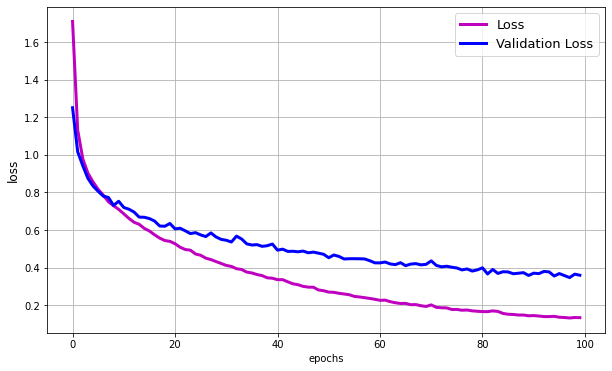

In [58]:
plt.figure(figsize=(10,6))
plt.plot(cnnhistory.history['loss'], 'm', linewidth=3)
plt.plot(cnnhistory.history['val_loss'], 'b', linewidth=3)
plt.legend(['Loss', 'Validation Loss'], fontsize=13)
plt.xlabel('epochs')
plt.ylabel('loss', fontsize=12)
plt.grid(True)
plt.show()

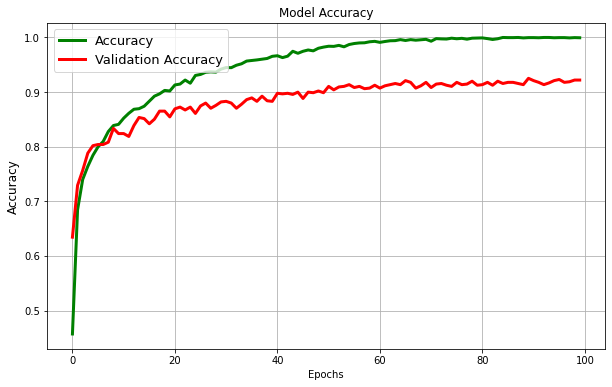

In [59]:
plt.figure(figsize=(10,6), frameon=True)
plt.plot(cnnhistory.history['accuracy'], 'g', linewidth=3)
plt.plot(cnnhistory.history['val_accuracy'], 'r', linewidth=3)
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy', fontsize=12)
plt.legend(['Accuracy', 'Validation Accuracy'], loc = 'upper left', fontsize=13)
plt.grid(True)
plt.show()

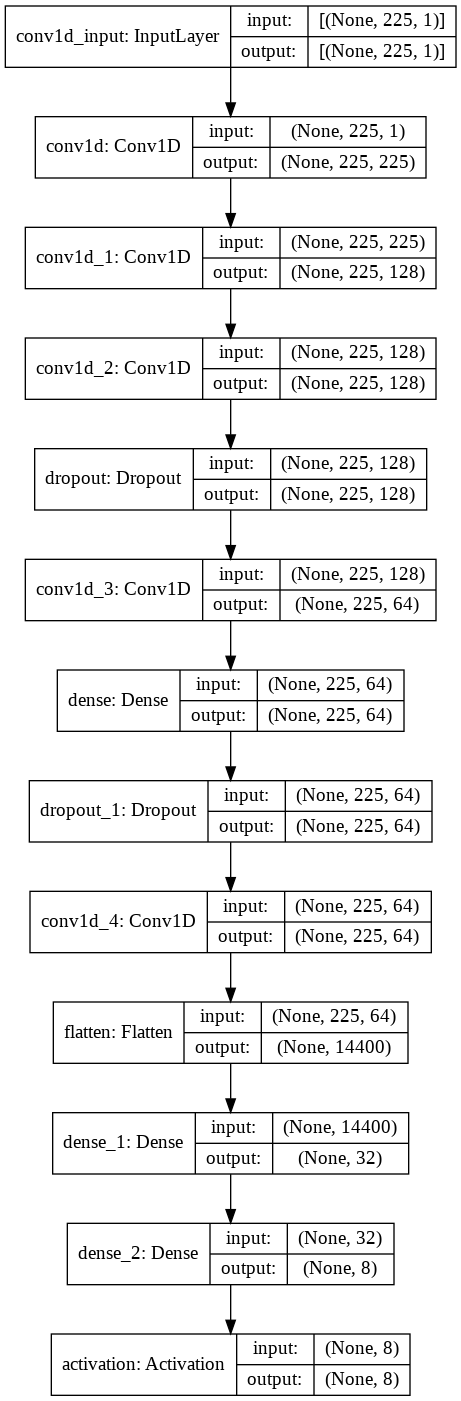

In [60]:
tf.keras.utils.plot_model(
    model,
    to_file="img_model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

dot_img_file = (model_path + 'img_cnn_model_' + model_name + '.png')
tf.keras.utils.plot_model(model, to_file = dot_img_file, show_shapes=True)


# **SAVING THE MODEL**

In [61]:
model.save(os.path.join(model_path, (model_name + '_MODEL.h5')))
print('Saved trained model at %s ' % model_path)

model_json = model.to_json()
with open((model_path + model_name + '_MODEL.json'), "w") as json_file:
    json_file.write(model_json)

Saved trained model at /content/drive/MyDrive/My_AI/EmoRec/ 


# **LOADING THE MODEL**

In [62]:
json_file = open(model_path + model_name + '_MODEL.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(model_path + model_name + '_MODEL.h5')
print("Loaded model from disk")

opt = tf.keras.optimizers.Adam(learning_rate=0.0001) 
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 92.20%


# **Predicting emotions on the test data**


In [63]:
lb = LabelEncoder()
with open((model_path + gender + '_classes_emotions.pkl'), 'rb') as f:
  lb.classes_ = pickle.load(f)
print(lb.classes_)

predicted = loaded_model.predict(x_testcnn, batch_size=32, verbose=1)
predicted = predicted.argmax(axis=1)
predicted = predicted.astype(int).flatten()

predictions = (lb.inverse_transform((predicted)))
predictions_df = pd.DataFrame({'predictedvalues': predictions})

actual = y_test.argmax(axis=1)
actual = actual.astype(int).flatten()

actual_labels = (lb.inverse_transform((actual)))

actual_labels = pd.DataFrame({'actualvalues': actual_labels})
actual_pred_df = actual_labels.join(predictions_df)

actual_pred_df[40:50]

['female_anger' 'female_calm' 'female_disgust' 'female_fear' 'female_joy'
 'female_neutral' 'female_sadness' 'female_surprise']
30/30 [==============================] - 3s 87ms/step


,actualvalues,predictedvalues
40,female_sadness,female_sadness
41,female_joy,female_joy
42,female_sadness,female_sadness
43,female_disgust,female_disgust
44,female_joy,female_joy
45,female_neutral,female_neutral
46,female_surprise,female_surprise
47,female_sadness,female_sadness
48,female_disgust,female_disgust
49,female_joy,female_joy


In [64]:
actual_pred_df.groupby('actualvalues').count()

,predictedvalues
actualvalues,
female_anger,139
female_calm,16
female_disgust,116
female_fear,130
female_joy,151
female_neutral,126
female_sadness,145
female_surprise,126


In [65]:
actual_pred_df.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_anger,132
female_calm,18
female_disgust,115
female_fear,143
female_joy,152
female_neutral,135
female_sadness,136
female_surprise,118


In [66]:
actual_pred_df.to_csv(model_path + model_name + '_PREDICTIONS' + '.csv', index=False)

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

classes = actual_pred_df.actualvalues.unique()
classes.sort()    
print(classification_report(actual_pred_df.actualvalues, actual_pred_df.predictedvalues, target_names=classes))


                 precision    recall  f1-score   support

   female_anger       0.93      0.88      0.91       139
    female_calm       0.83      0.94      0.88        16
 female_disgust       0.97      0.96      0.96       116
    female_fear       0.83      0.91      0.86       130
     female_joy       0.95      0.95      0.95       151
 female_neutral       0.92      0.98      0.95       126
 female_sadness       0.93      0.88      0.90       145
female_surprise       0.96      0.90      0.93       126

       accuracy                           0.92       949
      macro avg       0.91      0.92      0.92       949
   weighted avg       0.92      0.92      0.92       949



0.9220231822971549


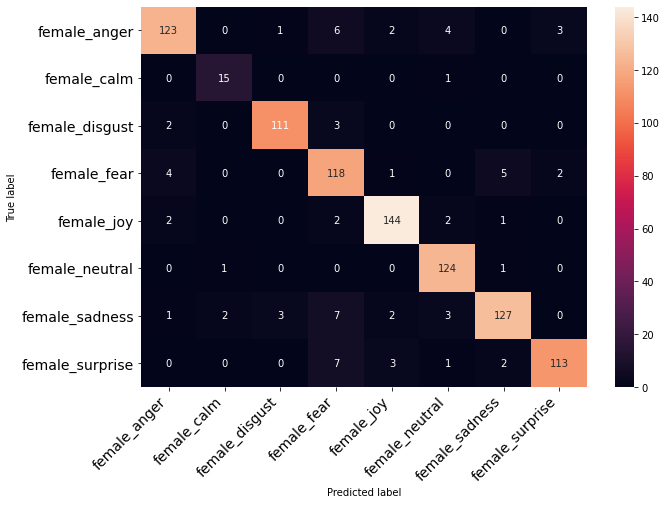

In [70]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def gender(row):
    if row == 'female_disgust' or 'female_fear' or 'female_joy' or 'female_sadness' or 'female_surprise' or 'female_neutral' or 'female_anger' or 'female_calm':
        return 'female'

actual_pred_df = pd.read_csv(model_path + model_name + '_PREDICTIONS' + '.csv')
classes = actual_pred_df.actualvalues.unique()
classes.sort()    

c = confusion_matrix(actual_pred_df.actualvalues, actual_pred_df.predictedvalues)
print(accuracy_score(actual_pred_df.actualvalues, actual_pred_df.predictedvalues))
print_confusion_matrix(c, class_names = classes)